In [69]:
import models
import utils
import data_processing
from constants import (
    VALUE_COLUMN,
    UNIT_RATE_COLUMN,
    QUANTITY_COLUMN,
    GROSS_WEIGHT_COLUMN,
    SHIP_COUNT_COLUMN,
    PORT_COUNT_COLUMN,
    FILL_METHOD,
    TARGET_COLUMN,
    VOLZA_COLUMNS,
    AIS_COLUMNS,
    OIL_COLUMNS,
    ARIMA_RESIDUAL_COLUMN,
    RANDOM_STATE
)
import pandas as pd
import constants
import sys
from datetime import datetime
from build_data import get_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

import matplotlib.pyplot as plt
import numpy as np

In [70]:
COMMODITYS = ['cobalt', 'copper', 'germanium', 'magnesium']
#target_COMMODITY = "copper"
target_COMMODITY = "copper"
WINDOW_SIZE = 20

In [71]:
pre_features = []
pre_labels = []
tar_features = []
tar_labels = []
for COMMODITY in COMMODITYS:
    VOLZA_FILE_PATH = f"../volza/{COMMODITY}/{COMMODITY}.csv"
    PRICE_FILE_PATH = f"../volza/{COMMODITY}/{COMMODITY}_prices.csv"
    
    # Get the data
    data = get_data(VOLZA_FILE_PATH, PRICE_FILE_PATH, window_size=20, center=False)
    
    # Add Isolation Forest spikes column
    data['spikes_if'] = utils.detect_spikes_if(data, TARGET_COLUMN + VOLZA_COLUMNS, contamination=0.1)
    
    # Add Bowen's spike detection
    _, features, labels = utils.detect_spikes_new(data, TARGET_COLUMN, window_size=WINDOW_SIZE, center=False)
    if COMMODITY == target_COMMODITY:
        tar_features.extend(features)
        tar_labels.extend(labels)
        continue
    pre_features.extend(features)
    pre_labels.extend(labels)

Building data...


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

Rows dropped due to NaN values: 1


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Detecting spikes... 20
Building data...


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

Rows dropped due to NaN values: 1


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
c:\Users\manim\Lab

Detecting spikes... 20
Building data...
Rows dropped due to NaN values: 3


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Detecting spikes... 20
Building data...


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

Rows dropped due to NaN values: 1
Detecting spikes... 20


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [72]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomOverSampler
output_file_path = f'{target_COMMODITY}/test/results_test.csv'
pred_file_path = f'{target_COMMODITY}/test/predictions/test'
model_path = f'{target_COMMODITY}/best_model'

In [73]:
aggregated_df = data
SPIKE_COLUMN = 'spikes_if'

In [74]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

aggregated_df['Price_binned'] = discretizer.fit_transform(aggregated_df[['Price']])
aggregated_df

c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,Date,Value,Std. Quantity (KG),Gross Weight,Std. Unit Rate ($/KG),ship_count,popular_port,popular_port_count,Price,Brent Oil Value,WTI Oil Value,ARIMA_Residuals,spikes,spikes_if,Price_binned
1,2020-01-02,1.125000e+05,50000.00,50080.0,2.250000,NaN,NaN,NaN,14150.0,67.05,61.17,14150.000000,0,0,0.0
2,2020-01-03,8.744076e+05,100172.26,25040.0,768.449153,NaN,NaN,NaN,14100.0,69.08,63.00,-1453.965633,0,1,0.0
3,2020-01-04,2.950597e+05,135000.00,0.0,2.188610,NaN,NaN,NaN,14100.0,69.08,63.00,10.015443,0,0,0.0
4,2020-01-05,4.420000e+04,20000.00,0.0,2.210000,NaN,NaN,NaN,14100.0,69.08,63.00,0.000000,0,0,0.0
5,2020-01-06,1.780024e+04,5001.00,2218.5,1450.844898,NaN,NaN,NaN,14100.0,70.25,63.27,0.000000,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2022-12-27,9.624998e+04,25000.00,25040.0,3.849999,27245.0,SGSIN,9195.0,21700.0,82.45,79.45,-4500.000000,0,0,0.0
965,2022-12-28,1.122651e+06,286996.89,80306.0,5.656118,26021.0,SGSIN,9233.0,21650.0,81.70,78.89,-4550.000000,0,0,0.0
966,2022-12-29,1.303649e+06,356878.00,0.0,3.490332,24039.0,SGSIN,8861.0,21650.0,80.96,78.43,-4550.000000,0,0,0.0
967,2022-12-30,9.095473e+05,212842.00,44080.0,3.949859,19952.0,SGSIN,8118.0,21650.0,82.82,80.16,-4550.000000,0,0,0.0


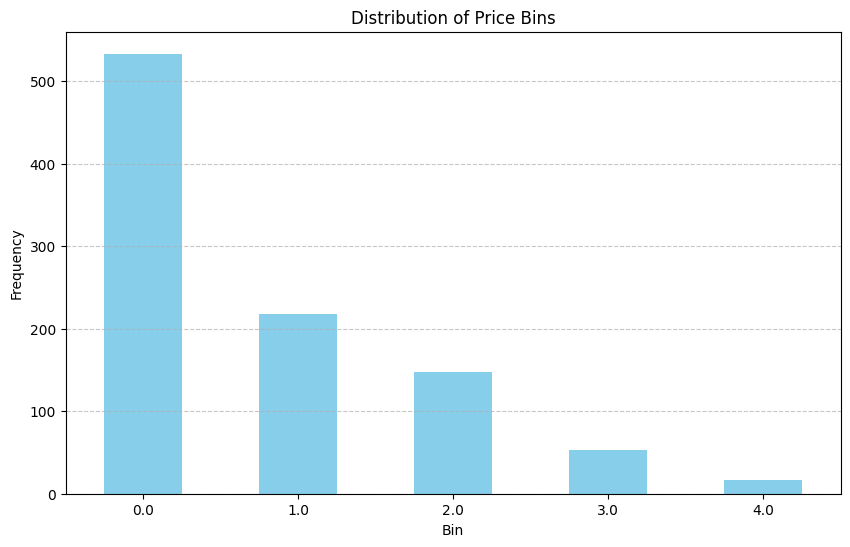

In [75]:
import matplotlib.pyplot as plt

# Assuming 'Price_binned' has been properly added to 'aggregated_df'
# Count the frequency of each bin
bin_counts = aggregated_df['Price_binned'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Price Bins')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [76]:
# TARGET_COLUMN = ['Price_binned']

In [77]:
# Prepare price data
X_price, y_price = data_processing.prepare_features_and_target(aggregated_df, TARGET_COLUMN, SPIKE_COLUMN)
# X_price = np.array(tar_features)
# y_price = np.array(tar_labels)

# Split price data
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.3, random_state=RANDOM_STATE, shuffle=False)
X_train_price, X_val_price, y_train_price, y_val_price = train_test_split(X_train_price, y_train_price, test_size=(10/70), random_state=RANDOM_STATE, shuffle=False)

# Discretizing


# Balancing
X_train_price, y_train_price = sampler(random_state=RANDOM_STATE).fit_resample(X_train_price, y_train_price)

# Scaling
X_train_price, X_test_price, X_val_price = data_processing.scale_features(X_train_price, X_test_price, X_val_price)

# Sequence making
X_train_price, y_train_price = data_processing.create_sequences(X_train_price, y_train_price, WINDOW_SIZE)
X_test_price, y_test_price = data_processing.create_sequences(X_test_price, y_test_price, WINDOW_SIZE)
X_val_price, y_val_price = data_processing.create_sequences(X_val_price, y_val_price, WINDOW_SIZE)


X_train_price = np.expand_dims(X_train_price, axis = 2)
X_test_price = np.expand_dims(X_test_price, axis = 2)
X_val_price = np.expand_dims(X_val_price, axis = 2)

In [78]:
results_df  = models.evaluate_all(X_train_price, y_train_price, X_val_price, y_val_price, X_test_price, y_test_price, output_file_path, pred_file_path, model_path, False, False)

9/9 [==============================] - 0s 5ms/step
Predictions saved to CSV file: copper/test/predictions/test/LSTM_256_layers_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/LSTM_256_layers_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/LSTM_256_layers_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/LSTM_256_layers_predictions.npy
{'Name': 'LSTM', 'Params': '256 layers', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 3ms/step
Predictions saved to CSV file: copper/test/predictions/test/LSTM_128_layers_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/LSTM_128_layers_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/LSTM_128_layers_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/LSTM_128_layers_predictions.npy
{'Name': 'LSTM', 'Params': '128 layers', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 2ms/step
Predictions saved to CSV file: copper/test/predictions/test/LSTM_64_layers_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/LSTM_64_layers_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/LSTM_64_layers_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/LSTM_64_layers_predictions.npy
{'Name': 'LSTM', 'Params': '64 layers', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 2ms/step
Predictions saved to CSV file: copper/test/predictions/test/LSTM_32_layers_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/LSTM_32_layers_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/LSTM_32_layers_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/LSTM_32_layers_predictions.npy
{'Name': 'LSTM', 'Params': '32 layers', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}
Failed to evaluate CNN with Attention 32 filters and 7 kernel size: One of the dimensions in the output is <= 0 due to downsampling in conv1d_144. Consider increasing the input size. Received input shape [None, 20, 1, 1] which would produce output shape with a zero or negative value in a dimension.
Failed to evaluate CNN with Atte

c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 2ms/step
Predictions saved to CSV file: copper/test/predictions/test/RNN_256_units_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/RNN_256_units_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/RNN_256_units_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/RNN_256_units_predictions.npy
RNN_256_units: {'Name': 'RNN', 'Params': '256 units', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 2ms/step
Predictions saved to CSV file: copper/test/predictions/test/RNN_128_units_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/RNN_128_units_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/RNN_128_units_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/RNN_128_units_predictions.npy
RNN_128_units: {'Name': 'RNN', 'Params': '128 units', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 1ms/step
Predictions saved to CSV file: copper/test/predictions/test/RNN_64_units_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/RNN_64_units_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/RNN_64_units_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/RNN_64_units_predictions.npy
RNN_64_units: {'Name': 'RNN', 'Params': '64 units', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 1ms/step
Predictions saved to CSV file: copper/test/predictions/test/RNN_32_units_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/RNN_32_units_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/RNN_32_units_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/RNN_32_units_predictions.npy
RNN_32_units: {'Name': 'RNN', 'Params': '32 units', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 798us/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_32_filters_7_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_32_filters_7_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_32_filters_7_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_32_filters_7_kernels_predictions.npy
CNN_32_filters_7_kernels {'Name': 'CNN', 'Params': '32 filters, kernel size 7', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 877us/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_32_filters_5_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_32_filters_5_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_32_filters_5_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_32_filters_5_kernels_predictions.npy
CNN_32_filters_5_kernels {'Name': 'CNN', 'Params': '32 filters, kernel size 5', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 1ms/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_32_filters_3_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_32_filters_3_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_32_filters_3_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_32_filters_3_kernels_predictions.npy
CNN_32_filters_3_kernels {'Name': 'CNN', 'Params': '32 filters, kernel size 3', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 1ms/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_64_filters_7_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_64_filters_7_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_64_filters_7_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_64_filters_7_kernels_predictions.npy
CNN_64_filters_7_kernels {'Name': 'CNN', 'Params': '64 filters, kernel size 7', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 899us/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_64_filters_5_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_64_filters_5_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_64_filters_5_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_64_filters_5_kernels_predictions.npy
CNN_64_filters_5_kernels {'Name': 'CNN', 'Params': '64 filters, kernel size 5', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 940us/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_64_filters_3_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_64_filters_3_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_64_filters_3_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_64_filters_3_kernels_predictions.npy
CNN_64_filters_3_kernels {'Name': 'CNN', 'Params': '64 filters, kernel size 3', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 1ms/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_128_filters_7_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_128_filters_7_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_128_filters_7_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_128_filters_7_kernels_predictions.npy
CNN_128_filters_7_kernels {'Name': 'CNN', 'Params': '128 filters, kernel size 7', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 939us/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_128_filters_5_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_128_filters_5_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_128_filters_5_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_128_filters_5_kernels_predictions.npy
CNN_128_filters_5_kernels {'Name': 'CNN', 'Params': '128 filters, kernel size 5', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 939us/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_128_filters_3_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_128_filters_3_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_128_filters_3_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_128_filters_3_kernels_predictions.npy
CNN_128_filters_3_kernels {'Name': 'CNN', 'Params': '128 filters, kernel size 3', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 1ms/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_256_filters_7_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_256_filters_7_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_256_filters_7_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_256_filters_7_kernels_predictions.npy
CNN_256_filters_7_kernels {'Name': 'CNN', 'Params': '256 filters, kernel size 7', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 1ms/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_256_filters_5_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_256_filters_5_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_256_filters_5_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_256_filters_5_kernels_predictions.npy
CNN_256_filters_5_kernels {'Name': 'CNN', 'Params': '256 filters, kernel size 5', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

9/9 [==============================] - 0s 1ms/step
Predictions saved to CSV file: copper/test/predictions/test/CNN_256_filters_3_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/CNN_256_filters_3_kernels_predictions.npy
Predictions saved to CSV file: copper/test/predictions/test_confidence/CNN_256_filters_3_kernels_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test_confidence/CNN_256_filters_3_kernels_predictions.npy
CNN_256_filters_3_kernels {'Name': 'CNN', 'Params': '256 filters, kernel size 3', 'Accuracy': 0.9338235294117647, 'Precision (0)': 0.9338235294117647, 'Recall (0)': 1.0, 'F1 (0)': 0.9657794676806084, 'Precision (1)': 0.0, 'Recall (1)': 0.0, 'F1 (1)': 0.0, 'Prior': '0.07'}
Predictions saved to CSV file: copper/test/predictions/test/Dumb_Model_spikes_predictions.csv
Predictions saved to NPY file: copper/test/predictions/test/Dumb_Model_spikes_predictions.npy
Predictions saved to CSV file: copper/test/predictions/tes

c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [79]:
results_df

,Name,Params,Accuracy,Precision (0),Recall (0),F1 (0),Precision (1),Recall (1),F1 (1),Prior
0,LSTM,256 layers,0.933824,0.933824,1.0,0.965779,0.000000,0.0,0.000000,0.07
1,LSTM,128 layers,0.933824,0.933824,1.0,0.965779,0.000000,0.0,0.000000,0.07
2,LSTM,64 layers,0.933824,0.933824,1.0,0.965779,0.000000,0.0,0.000000,0.07
3,LSTM,32 layers,0.933824,0.933824,1.0,0.965779,0.000000,0.0,0.000000,0.07
4,RNN,256 units,0.933824,0.933824,1.0,0.965779,0.000000,0.0,0.000000,0.07
5,RNN,128 units,0.933824,0.933824,1.0,0.965779,0.000000,0.0,0.000000,0.07
6,RNN,64 units,0.933824,0.933824,1.0,0.965779,0.000000,0.0,0.000000,0.07
7,RNN,32 units,0.933824,0.933824,1.0,0.965779,0.000000,0.0,0.000000,0.07
8,CNN,"32 filters, kernel size 7",0.933824,0.933824,1.0,0.965779,0.000000,0.0,0.000000,0.07
9,CNN,"32 filters, kernel size 5",0.933824,0.933824,1.0,0.965779,0.000000,0.0,0.000000,0.07
